# Importing Dependencies

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading the Dataset to a DataFrame

In [87]:
credit_card_data=pd.read_csv(r'C:\Users\dassi\anaconda3\creditcard.csv')


In [88]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [111]:
#DATASET INFORMATION
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
#we will see the distribution of legit and fraudlent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
# 0------>Normal Transactions
# 1------->

In [30]:
# Checking the class distribution of the target variable in percentage
print((credit_card_data.groupby('Class')['Class'].count()/credit_card_data['Class'].count()) *100)


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

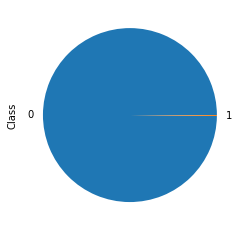

In [31]:
#Making pie plot for the distribution of legit and fraud transactions
((credit_card_data.groupby('Class')['Class'].count()/credit_card_data['Class'].count()) *100).plot.pie()

<AxesSubplot:xlabel='Class', ylabel='count'>

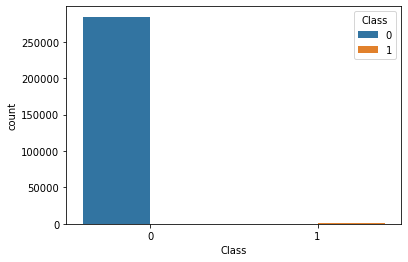

In [93]:
sns.countplot(x=credit_card_data.Class,hue=credit_card_data.Class)

In [37]:
#separating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [39]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [40]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [46]:
#compare the values of both the transarctions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [47]:
#UNDERSAMPLING
legit_sample=legit.sample(n=492)

In [49]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [55]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201954,134109.0,2.076886,-0.475102,-1.968172,-1.351795,-0.132971,-1.890956,0.524960,-0.552733,1.544933,...,0.015621,0.269282,-0.016352,0.102095,0.361129,-0.135863,-0.048167,-0.067384,40.45,0
227273,145008.0,-0.778039,1.035482,0.573429,-1.256981,1.390642,-0.152783,1.069810,0.141593,-0.677681,...,-0.335878,-1.121145,-0.356217,0.097387,0.574078,0.220104,-0.062474,0.050529,0.69,0
173052,121339.0,1.991632,-0.373446,-0.471425,0.189786,-0.502336,-0.254881,-0.623145,0.126141,1.106720,...,-0.132558,-0.338660,0.317468,-0.566789,-0.444061,-0.601379,0.023015,-0.048126,1.00,0
102731,68336.0,-0.292645,1.047114,0.673981,-0.315439,0.889253,0.306672,0.644610,0.141723,-0.334172,...,-0.322552,-0.817518,-0.145849,-1.375272,-0.037792,0.187560,0.259367,0.081455,9.99,0
124620,77361.0,1.488151,-1.148501,0.068315,-1.669038,-1.002431,0.211289,-1.177622,0.147214,-1.891404,...,-0.200745,-0.235874,-0.039045,-0.860596,0.358168,-0.139218,0.034374,-0.003061,15.00,0


In [57]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [62]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94563.926829,0.006552,-0.012104,0.027766,0.043474,-0.012547,-0.069907,0.033505,0.065008,-0.082794,...,0.010474,-0.019167,-0.019215,-0.004688,-0.020341,0.024835,0.014123,0.024357,0.005406,89.963984
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [65]:
#splitiing the data into features and targets
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [66]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
201954  134109.0  2.076886 -0.475102 -1.968172 -1.351795 -0.132971 -1.890956   
227273  145008.0 -0.778039  1.035482  0.573429 -1.256981  1.390642 -0.152783   
173052  121339.0  1.991632 -0.373446 -0.471425  0.189786 -0.502336 -0.254881   
102731   68336.0 -0.292645  1.047114  0.673981 -0.315439  0.889253  0.306672   
124620   77361.0  1.488151 -1.148501  0.068315 -1.669038 -1.002431  0.211289   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [67]:
print(y)

201954    0
227273    0
173052    0
102731    0
124620    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [68]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [69]:
print(x_train,x_train.shape,x_test.shape)

            Time         V1        V2         V3        V4         V5  \
100623   67571.0  -0.758469 -0.045410  -0.168438 -1.313275  -1.901763   
67913    52749.0  -2.355188  0.734230   1.156422 -0.300105   1.441742   
269568  163685.0   1.941896 -0.204344  -0.200410  0.225493  -0.541027   
150371   93191.0   2.117724  0.372294  -1.869698  1.338810   1.062975   
171728  120788.0   1.940494 -0.731057  -0.061078  0.630939  -1.122540   
...          ...        ...       ...        ...       ...        ...   
251205  155269.0   1.734216 -0.788138  -1.490486  0.223384  -0.030422   
232661  147255.0  -1.062274  0.813386   0.268811 -1.020932   1.512555   
223618  143456.0  -2.006582  3.676577  -5.463811  7.232058  -1.627859   
43061    41353.0 -15.020981  8.075240 -16.298091  5.664820 -11.918153   
114976   73696.0  -0.457165  0.790365   1.193041 -0.748499  -0.468281   

              V6         V7        V8        V9  ...       V20       V21  \
100623  0.739433   3.071892 -0.483422  0.618203

# Logistic Regression 

In [71]:
#model Training
model=LogisticRegression()

In [73]:
model.fit(x_train,y_train)


LogisticRegression()

Model Evaluation


ACCURACY SCORE

In [76]:
#ACCURACY ON TRAINING DATA
x_train_prediction=model.predict(x_train)
x_train_accuracy=accuracy_score(x_train_prediction,y_train)

In [80]:
print("The accuracy on training data:",x_train_accuracy)

The accuracy on training data: 0.9440914866581956


In [83]:
#Accuracy onn the testing data
x_test_prediction=model.predict(x_test)
x_test_accuracy=accuracy_score(x_test_prediction,y_test)

In [84]:
print("The accuracy of the testing data:",x_test_accuracy)

The accuracy of the testing data: 0.9137055837563451
